In [4]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)


You should consider upgrading via the 'c:\users\user\.pyenv\pyenv-win\versions\3.8.6\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import make_regression

# %matplotlib inline

In [6]:
dataset = pd.read_csv("data.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,52000
3,Manager,4,70000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# X.shape

In [8]:
tr_X = X[:8] # training feature
ts_X = X[8:] # testing feature
tr_y = y[:8] # training target
ts_y = y[8:] # testing feature

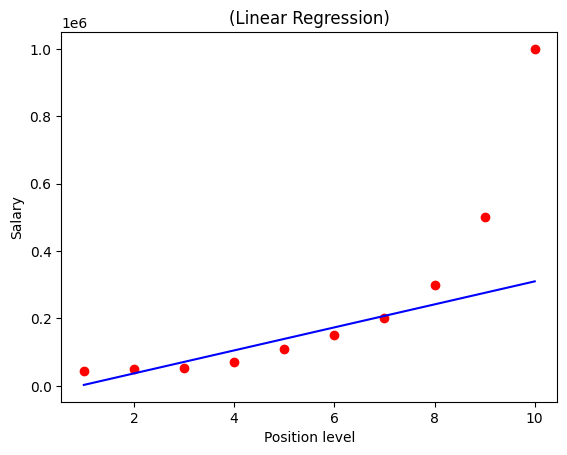

In [9]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(tr_X, tr_y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('(Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(ts_y, lin_reg.predict(ts_X)), r2_score(ts_y, lin_reg.predict(ts_X))

(457101.1904761904, -3.211111116780044)

In [8]:
lin_reg.coef_ , lin_reg.intercept_

(array([34154.76190476]), -31571.428571428638)

## Interpretation
- If all other independent variables are fixed, then 1 unit change of `Level` will increase or decrease salary (y) 34154 unit. 
- If all independent variables are Zero, then salary (y) will be -31571 unit. 

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]]


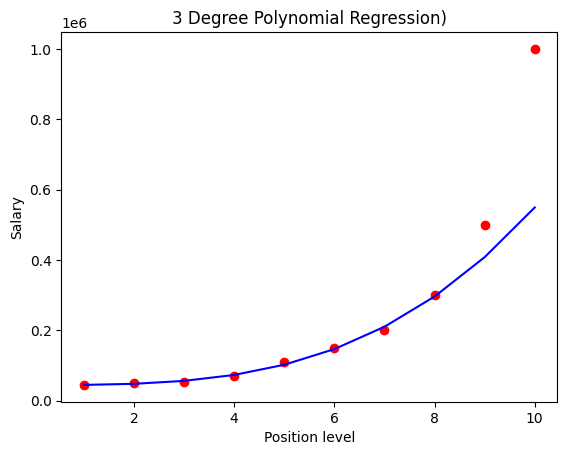

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

i = 3
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(tr_X)
print(X_poly)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, tr_y)

# Visualizing the Polymonial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title(f'{i} Degree Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
feature = poly_reg.fit_transform(ts_X)
print(mean_absolute_error(ts_y, pol_reg.predict(feature)))
print(r2_score(ts_y, pol_reg.predict(feature)))

271416.66666666674
-0.693307541950114


In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

for i in range(2, 11):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)


    # Visualizing the Polymonial Regression results
    print('deg :', i, 'MAE: ', mean_absolute_error(y, pol_reg.predict(poly_reg.fit_transform(X))))

    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title(f'{i} Degree Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()


deg : 2 MAE:  69263.03030303025
deg : 3 MAE:  35979.02097902
deg : 4 MAE:  13441.02564103781
deg : 5 MAE:  2460.792540757767
deg : 6 MAE:  2088.811189091875
deg : 7 MAE:  1541.958072930301
deg : 8 MAE:  49.49388220961555
deg : 9 MAE:  0.06040755962021649
deg : 10 MAE:  0.00021766040154034272


# Self-study
Read about bias-variance trade-off.
